In [7]:
# 填补缺失值
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor


In [44]:
wine = load_boston()
x_full = wine.data
y_full = wine.target

# 得到他们特征的行和列的值
n_samples = x_full.shape[0]
n_features = x_full.shape[1]

# 现在我们要将其中的50% 设定为空值，构造随机的行和列
n_rate = 0.5
import numpy as np
# 构造成整数
n_number = int(np.floor(n_samples * n_features * n_rate))
rng = np.random.RandomState(0)
# 随机选出行和列
n_row = rng.randint(0,n_samples,n_number)
n_column = rng.randint(0,n_features,n_number)

# 组合起来这些行和列进 行填空
x_null = x_full.copy()
y_null = y_full.copy()

import pandas as pd
x_null[n_row,n_column] = np.nan
x_null = pd.DataFrame(x_null)
x_null.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,NaN,2.31,0.0,NaN,6.575,65.2,4.0900,1.0,NaN,NaN,NaN,NaN
1,0.02731,0.0,NaN,0.0,0.469,6.421,NaN,4.9671,2.0,242.0,17.8,NaN,9.14
2,0.02729,NaN,7.07,0.0,NaN,7.185,NaN,4.9671,NaN,242.0,NaN,392.83,4.03
3,0.03237,0.0,NaN,NaN,0.458,NaN,NaN,NaN,NaN,222.0,18.7,394.63,NaN
4,NaN,0.0,2.18,0.0,0.458,NaN,54.2,NaN,3.0,NaN,18.7,396.90,NaN


In [24]:
# 利用O进行填补
from sklearn.impute import SimpleImputer
fill_0 = SimpleImputer(missing_values = np.nan,strategy = 'constant',fill_value = 0)
x_null_0 = fill_0.fit_transform(x_null)
pd.DataFrame(x_null_0).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00000,0.0,2.31,0.0,0.000,6.575,65.2,4.0900,1.0,0.0,0.0,0.00,0.00
1,0.02731,0.0,0.00,0.0,0.469,6.421,0.0,4.9671,2.0,242.0,17.8,0.00,9.14
2,0.02729,0.0,7.07,0.0,0.000,7.185,0.0,4.9671,0.0,242.0,0.0,392.83,4.03
3,0.03237,0.0,0.00,0.0,0.458,0.000,0.0,0.0000,0.0,222.0,18.7,394.63,0.00
4,0.00000,0.0,2.18,0.0,0.458,0.000,54.2,0.0000,3.0,0.0,18.7,396.90,0.00


In [25]:
# 利用均值进行填补
fill_mean = SimpleImputer(missing_values = np.nan,strategy = 'mean')
x_null_mean = fill_mean.fit_transform(x_null)
pd.DataFrame(x_null_mean).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.855881,10.782748,2.310000,0.000000,0.552046,6.575000,65.200000,4.090000,1.000000,422.954248,18.408667,360.073627,12.924455
1,0.027310,0.000000,10.358833,0.000000,0.469000,6.421000,70.320819,4.967100,2.000000,242.000000,17.800000,360.073627,9.140000
2,0.027290,10.782748,7.070000,0.000000,0.552046,7.185000,70.320819,4.967100,9.814332,242.000000,18.408667,392.830000,4.030000
3,0.032370,0.000000,10.358833,0.058065,0.458000,6.300877,70.320819,3.858587,9.814332,222.000000,18.700000,394.630000,12.924455
4,3.855881,0.000000,2.180000,0.000000,0.458000,6.300877,54.200000,3.858587,3.000000,422.954248,18.700000,396.900000,12.924455


In [46]:
# 利用随机森林及进行填补
# 首先把缺失值最少的列作为标签列，先找出缺失值最少的列
x_null_reg = x_null.copy()
sortindex = np.argsort(x_null_reg.isnull().sum(axis = 0)).values
x_null_reg.isnull().sum(axis = 0)

0     200
1     193
2     189
3     196
4     202
5     206
6     213
7     182
8     199
9     200
10    206
11    211
12    203
dtype: int64

In [47]:
x_null_reg.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,NaN,2.31,0.0,NaN,6.575,65.2,4.0900,1.0,NaN,NaN,NaN,NaN
1,0.02731,0.0,NaN,0.0,0.469,6.421,NaN,4.9671,2.0,242.0,17.8,NaN,9.14
2,0.02729,NaN,7.07,0.0,NaN,7.185,NaN,4.9671,NaN,242.0,NaN,392.83,4.03
3,0.03237,0.0,NaN,NaN,0.458,NaN,NaN,NaN,NaN,222.0,18.7,394.63,NaN
4,NaN,0.0,2.18,0.0,0.458,NaN,54.2,NaN,3.0,NaN,18.7,396.90,NaN


In [48]:
for i in sortindex:
    # 构建新的标签和特征
    df = x_null_reg
    fill_c = df.iloc[:,i]
    df = pd.concat([df.iloc[:,df.columns != i] ,pd.DataFrame(y_full)],axis = 1)
    # 在新特征矩阵中对缺失值进行0的填补
    df_0 = SimpleImputer(missing_values = np.nan,strategy = 'constant',
                        fill_value =0).fit_transform(df)
    
    # 找出特征集合训练集
    y_test = fill_c[fill_c.isnull()]
    y_train = fill_c[fill_c.notnull()]
    x_test= df_0[y_test.index,:]
    x_train = df_0[y_train.index,:]
    
    # 用随机森林来填补缺失值
    rfr = RandomForestRegressor(n_estimators = 100)
    rfr = rfr.fit(x_train,y_train)
    Ypredict = rfr.predict(x_test)
    
    # 将训练好的特征值返回到原始特征序列这种
    x_null_reg.loc[x_null_reg.iloc[:,i].isnull(),i] = Ypredict
#     x_missing_reg.loc[x_missing_reg.iloc[:,i].isnull(),i] = ypreduct
    
x_null_reg

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.132771,8.605,2.3100,0.00,0.467128,6.57500,65.200,4.090000,1.00,245.72,18.569,391.1268,7.9641
1,0.027310,0.000,5.9185,0.00,0.469000,6.42100,48.176,4.967100,2.00,242.00,17.800,393.1134,9.1400
2,0.027290,26.820,7.0700,0.00,0.440491,7.18500,30.863,4.967100,4.88,242.00,16.152,392.8300,4.0300
3,0.032370,0.000,3.5056,0.02,0.458000,7.10425,45.438,4.554224,4.06,222.00,18.700,394.6300,5.4479
4,0.049957,0.000,2.1800,0.00,0.458000,7.09373,54.200,4.994179,3.00,215.99,18.700,396.9000,5.8708
5,0.043723,0.000,2.1800,0.00,0.458000,6.43000,33.181,6.062200,3.00,294.80,17.899,390.3084,5.4940
6,0.088290,6.720,6.1136,0.06,0.524000,6.01200,66.600,5.560500,5.00,311.00,15.200,395.6000,9.3152
7,0.364246,12.500,7.8700,0.00,0.524000,6.58602,68.401,4.095819,4.48,285.21,16.929,390.4771,9.8175
8,0.211240,11.145,7.8700,0.04,0.524000,5.37326,100.000,6.082100,5.00,311.00,15.200,386.6300,29.9300
9,0.268676,12.500,7.8700,0.00,0.503920,6.00400,85.900,6.592100,4.86,311.00,15.200,385.2997,17.1000


In [53]:
from sklearn.model_selection import cross_val_score
x = [x_full,x_null_mean,x_null_0,x_null_reg]

# 对所有的数据进行建模和机器学习
mse = []
std = []

for x in x:
    estimator = RandomForestRegressor(random_state = 0,n_estimators = 100)
    scores = cross_val_score(estimator,x,y_full,scoring = "neg_mean_squared_error",
                            cv =10).mean()
    mse.append(scores *-1)

In [54]:
mse

[21.765883307921563, 41.47548105101963, 43.66214346556863, 16.042183720235293]

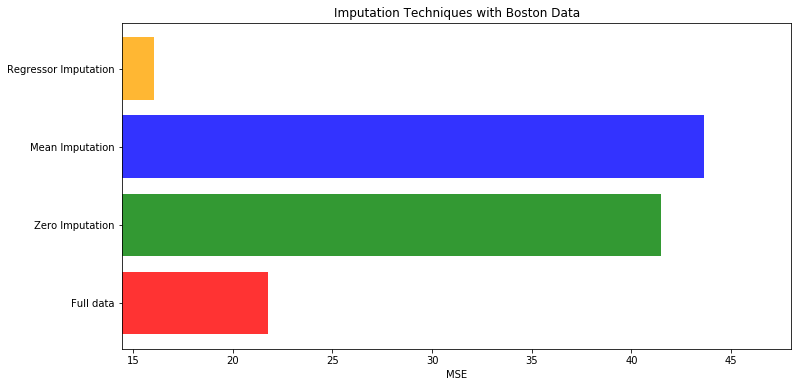

In [55]:
import matplotlib.pyplot as plt
# 用所得的结果绘制条形图
x_labels = ["Full data","Zero Imputation","Mean Imputation","Regressor Imputation"]
colors = ['r','g','b','orange']

plt.figure(figsize = (12,6))

ax = plt.subplot(111)

for i in np.arange(len(mse)):
    ax.barh(i,mse[i],color = colors[i],alpha = 0.8,align = 'center')

ax.set_title("Imputation Techniques with Boston Data")
ax.set_xlim(left = np.min(mse)*0.9,
            right = np.max(mse) * 1.1,
           )
ax.set_yticks(np.arange(len(mse)))
ax.set_xlabel('MSE')
ax.set_yticklabels(x_labels)


plt.show()